Análise de ações 

Leitura de dados com o yfinance

https://pypi.org/project/yfinance/

Instalação:
pip install yfinance

bibliotecas necessárias:
pip install pandas matplotlib seaborn

In [21]:
import yfinance as yf 
from datetime import datetime, timedelta
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sn

Carregando dados do dia IBOVESPA:
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

 O arquivo CSV contém caracteres especiais (acentos, cedilhas, etc.),
 e o erro 'UnicodeDecodeError' indicava que a codificação padrão (UTF-8)
 não conseguia interpretar corretamente os caracteres. 
 Para garantir a leitura correta, foi necessário definir encoding="utf-8".

 Além disso, o erro 'ParserError' indicava que o pandas esperava um número
 diferente de colunas devido ao delimitador incorreto.
 Como os dados estavam separados por ponto e vírgula (';') e não por vírgula (','),
 foi necessário especificar sep=";" para que o pandas interpretasse corretamente.


In [37]:
df_ibovespa = pd.read_csv("C:\\Users\\OPE_GABILLAUD31\\Desktop\\Igor\\Analise de ações\\IBOVDia_21-01-25.csv", encoding="utf-8", sep=";")
df_ibovespa

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ALOS3,ALLOS,ON NM,476.976.044,"0,431"
1,ABEV3,AMBEV S/A,ON,4.394.835.131,"2,429"
2,ASAI3,ASSAI,ON NM,1.345.832.968,"0,41"
3,AURE3,AUREN,ON NM,323.738.747,"0,126"
4,AMOB3,AUTOMOB,ON NM,533.959.816,"0,009"
...,...,...,...,...,...
84,VIVA3,VIVARA S.A.,ON NM,125.446.075,"0,122"
85,WEGE3,WEG,ON NM,1.243.177.587,"3,427"
86,YDUQ3,YDUQS PART,ON NM,277.677.050,"0,123"
87,Quantidade Teórica Total,NaN,NaN,98.374.532.289,100


Histórico das 10 ações com maior participacão na bolsa

In [ ]:
#df_ibovespa["Part. (%)"] = df_ibovespa["Part. (%)"].apply(lambda x: float(x.replace(",", ".")))

In [40]:
acoes = df_ibovespa.sort_values('Part. (%)').tail(10)['Código'].values
acoes

array(['B3SA3', 'BBDC4', 'SBSP3', 'WEGE3', 'ELET3', 'BBAS3', 'PETR3',
       'ITUB4', 'PETR4', 'Redutor'], dtype=object)

In [42]:
str_act = " ".join([i +'.SA' for i in acoes])

In [43]:
tickers = yf.Tickers(str_act)
tickers.tickers

{'B3SA3.SA': yfinance.Ticker object <B3SA3.SA>,
 'BBDC4.SA': yfinance.Ticker object <BBDC4.SA>,
 'SBSP3.SA': yfinance.Ticker object <SBSP3.SA>,
 'WEGE3.SA': yfinance.Ticker object <WEGE3.SA>,
 'ELET3.SA': yfinance.Ticker object <ELET3.SA>,
 'BBAS3.SA': yfinance.Ticker object <BBAS3.SA>,
 'PETR3.SA': yfinance.Ticker object <PETR3.SA>,
 'ITUB4.SA': yfinance.Ticker object <ITUB4.SA>,
 'PETR4.SA': yfinance.Ticker object <PETR4.SA>,
 'REDUTOR.SA': yfinance.Ticker object <REDUTOR.SA>}

Criando um dicionário que conterá como chaves os tickers de cada ativo (PETR4.SA, por exemplo) e como valores um DataFrame contendo os dados históricos de cada.

In [44]:
dict = {}
for ticker in tickers.tickers.keys():
    print("Baixando dados da {} ".format(ticker))
    dict[ticker] = tickers.tickers[ticker].history(period='max')

Baixando dados da B3SA3.SA 
Baixando dados da BBDC4.SA 
Baixando dados da SBSP3.SA 
Baixando dados da WEGE3.SA 
Baixando dados da ELET3.SA 
Baixando dados da BBAS3.SA 
Baixando dados da PETR3.SA 
Baixando dados da ITUB4.SA 
Baixando dados da PETR4.SA 
Baixando dados da REDUTOR.SA 


$REDUTOR.SA: possibly delisted; no timezone found


Combinando todos os dados em um único DataFrame, utilizando o preço de fechamento de cada ativo.

In [51]:
df_data = pd.DataFrame()
for ticker in tickers.tickers.keys():
    dict[ticker] = dict[ticker].rename(columns={'Close': ticker})
    df_data = df_data.join(dict[ticker][ticker], how='outer')

df_data

,B3SA3.SA,BBDC4.SA,SBSP3.SA,WEGE3.SA,ELET3.SA,BBAS3.SA,PETR3.SA,ITUB4.SA,PETR4.SA,REDUTOR.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,NaN,4.741245,0.119719,9.825566,0.479721,1.235682,NaN,1.276528,NaN
2000-01-04 00:00:00-02:00,NaN,NaN,4.460147,0.115518,9.350537,0.456905,1.166332,NaN,1.205911,NaN
2000-01-05 00:00:00-02:00,NaN,NaN,4.336030,0.115518,9.725559,0.461585,1.182094,NaN,1.193744,NaN
2000-01-06 00:00:00-02:00,NaN,NaN,4.314291,0.105016,9.500547,0.468020,1.172637,NaN,1.189615,NaN
2000-01-07 00:00:00-02:00,NaN,NaN,4.374959,0.105016,9.650554,0.457490,1.182094,NaN,1.195047,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-15 00:00:00-03:00,10.50,11.83,92.699997,54.160000,35.169998,25.270000,41.660000,32.220001,37.290001,NaN
2025-01-16 00:00:00-03:00,10.27,11.73,91.040001,53.669998,34.480000,25.379999,41.630001,32.119999,37.049999,NaN
2025-01-17 00:00:00-03:00,10.35,11.59,93.000000,54.169998,34.849998,25.350000,41.599998,32.349998,37.200001,NaN


Informando qual a primeira data na qual todos os ativos estudados já estavam na bolsa.

In [60]:
#COMO NA BASE DE DADOS NÃO EXISTIA UMA TUPLA COM TODOS OS DADOS (SEMPRE UM OU OUTRO TINHA NAN) FIZ UMA CONTAGEM
# NISSO ME GERA A PRIMEIRA DATA COM A MAIORIA DOS ATIVOS NA BOLSA

df_non_nan_counts = df_data.notna().sum(axis=1)  # Conta quantos ativos não têm NaN em cada data
primeira_data = df_non_nan_counts.idxmax()  # Pega a primeira data com o maior número de ativos presentes

print("Primeira data com mais ativos disponíveis:", primeira_data)




Primeira data com mais ativos disponíveis: 2008-01-02 00:00:00-02:00


Criando um DataFrame adicional para representar a variação percentual diária de cada ativo

In [64]:
df_per_day = df_data/df_data.shift(1)-1
df_per_day 

,B3SA3.SA,BBDC4.SA,SBSP3.SA,WEGE3.SA,ELET3.SA,BBAS3.SA,PETR3.SA,ITUB4.SA,PETR4.SA,REDUTOR.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-02:00,NaN,NaN,-0.059288,-0.035092,-0.048346,-0.047561,-0.056122,NaN,-0.055319,NaN
2000-01-05 00:00:00-02:00,NaN,NaN,-0.027828,0.000000,0.040107,0.010244,0.013514,NaN,-0.010090,NaN
2000-01-06 00:00:00-02:00,NaN,NaN,-0.005014,-0.090910,-0.023136,0.013942,-0.008000,NaN,-0.003459,NaN
2000-01-07 00:00:00-02:00,NaN,NaN,0.014062,0.000000,0.015789,-0.022500,0.008064,NaN,0.004567,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-15 00:00:00-03:00,0.067073,0.034996,0.049949,0.023238,0.031378,0.025152,0.013132,0.043394,0.012765,NaN
2025-01-16 00:00:00-03:00,-0.021905,-0.008453,-0.017907,-0.009047,-0.019619,0.004353,-0.000720,-0.003104,-0.006436,NaN
2025-01-17 00:00:00-03:00,0.007790,-0.011935,0.021529,0.009316,0.010731,-0.001182,-0.000721,0.007161,0.004049,NaN


Apresentando datas e valores percentuais dos ativos que obtiveram as piores oscilações

In [68]:
df_per_day.min().sort_values().to_frame(name="Pior Oscilação").join(df_per_day.idxmin().to_frame(name="Data"))


C:\Users\OPE_GABILLAUD31\AppData\Local\Temp\ipykernel_5816\1607654431.py:1: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_per_day.min().sort_values().to_frame(name="Pior Oscilação").join(df_per_day.idxmin().to_frame(name="Data"))


,Pior Oscilação,Data
B3SA3.SA,-0.661336,2011-05-09 00:00:00-03:00
BBDC4.SA,-0.432508,2009-05-29 00:00:00-03:00
PETR4.SA,-0.296978,2020-03-09 00:00:00-03:00
PETR3.SA,-0.296758,2020-03-09 00:00:00-03:00
ELET3.SA,-0.220074,2010-02-01 00:00:00-02:00
BBAS3.SA,-0.211712,2016-03-15 00:00:00-03:00
WEGE3.SA,-0.206198,2020-03-16 00:00:00-03:00
ITUB4.SA,-0.179643,2021-10-04 00:00:00-03:00
SBSP3.SA,-0.178300,2020-03-18 00:00:00-03:00
REDUTOR.SA,NaN,NaT


Estimar se existe uma maior probabilidade dos ativos performarem bem logo após um dia de queda.

In [75]:
df_per_day

,B3SA3.SA,BBDC4.SA,SBSP3.SA,WEGE3.SA,ELET3.SA,BBAS3.SA,PETR3.SA,ITUB4.SA,PETR4.SA,REDUTOR.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-02:00,NaN,NaN,-0.059288,-0.035092,-0.048346,-0.047561,-0.056122,NaN,-0.055319,NaN
2000-01-05 00:00:00-02:00,NaN,NaN,-0.027828,0.000000,0.040107,0.010244,0.013514,NaN,-0.010090,NaN
2000-01-06 00:00:00-02:00,NaN,NaN,-0.005014,-0.090910,-0.023136,0.013942,-0.008000,NaN,-0.003459,NaN
2000-01-07 00:00:00-02:00,NaN,NaN,0.014062,0.000000,0.015789,-0.022500,0.008064,NaN,0.004567,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-15 00:00:00-03:00,0.067073,0.034996,0.049949,0.023238,0.031378,0.025152,0.013132,0.043394,0.012765,NaN
2025-01-16 00:00:00-03:00,-0.021905,-0.008453,-0.017907,-0.009047,-0.019619,0.004353,-0.000720,-0.003104,-0.006436,NaN
2025-01-17 00:00:00-03:00,0.007790,-0.011935,0.021529,0.009316,0.010731,-0.001182,-0.000721,0.007161,0.004049,NaN


In [79]:
df_per_day[df_per_day.shift(1) < 0].mean()

B3SA3.SA      0.001197
BBDC4.SA      0.000629
SBSP3.SA      0.001134
WEGE3.SA      0.001267
ELET3.SA     -0.000037
BBAS3.SA      0.000494
PETR3.SA      0.000471
ITUB4.SA      0.000435
PETR4.SA      0.000629
REDUTOR.SA         NaN
dtype: float64

In [78]:
df_per_day[df_per_day.shift(1)< 0].std()

B3SA3.SA      0.028216
BBDC4.SA      0.024012
SBSP3.SA      0.025189
WEGE3.SA      0.021278
ELET3.SA      0.030563
BBAS3.SA      0.027575
PETR3.SA      0.028738
ITUB4.SA      0.022663
PETR4.SA      0.028208
REDUTOR.SA         NaN
dtype: float64

Média dos retornos
B3SA3 - 0.11974056596282495
BBDC4 - 0.06291346752278272
SBSP3 - 0.1133706265845682
WEGE3 - 0.1267140550016504
ELET3 - -0.0037486923181545093
BBAS3 - 0.04942224226976556
PETR3 - 0.04710989568777059
ITUB4 - 0.0435472557623121
PETR4 - 0.06292924905238347
Desvio padrão dos retornos
B3SA3 - 2.8216099443769953
BBDC4 - 2.401220852870287
SBSP3 - 2.51887353460317
WEGE3 - 2.1278070874633728
ELET3 - 3.0563450006332897
BBAS3 - 2.7574801931632953
PETR3 - 2.8737887328454823
ITUB4 - 2.266330817456911
PETR4 - 2.8207728517552786


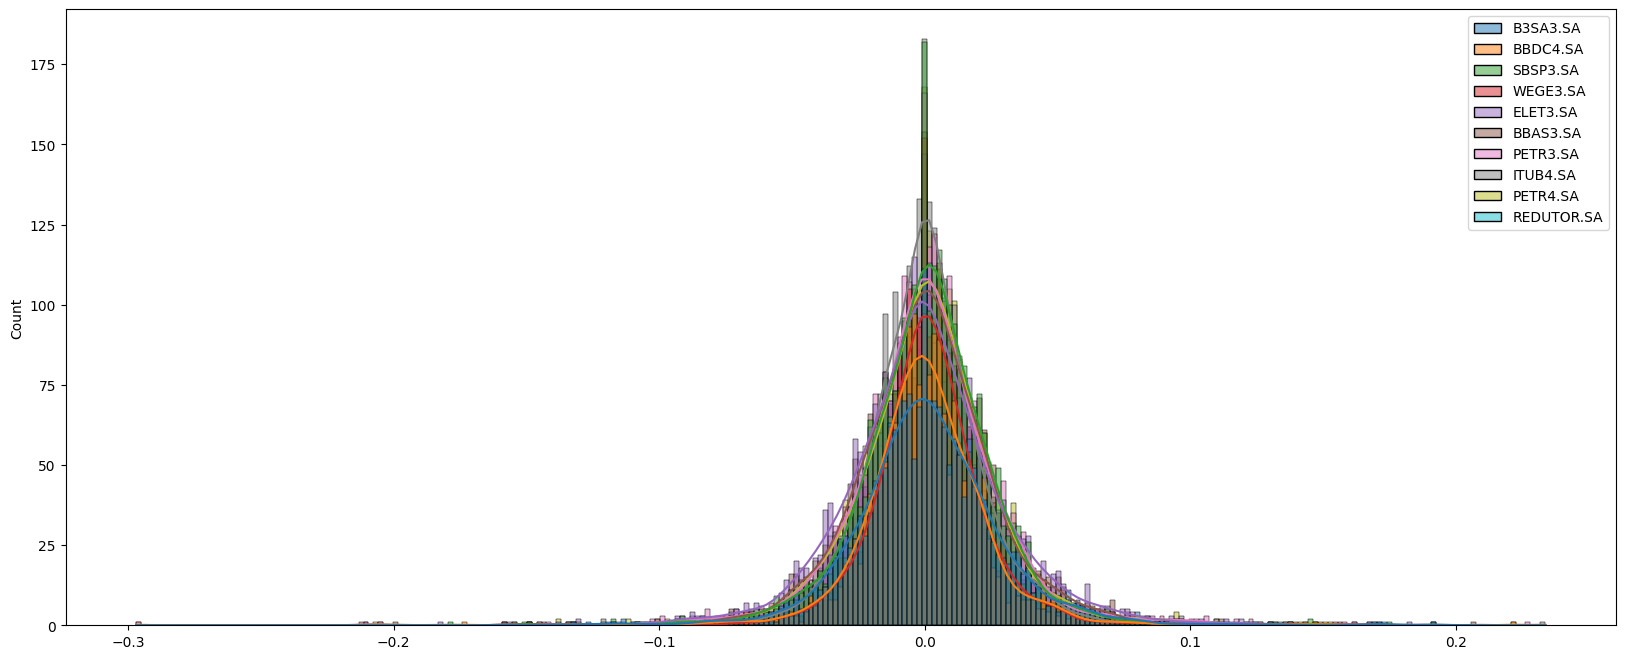

In [81]:
df_study = df_per_day[df_per_day.shift(1) < 0]

fig, ax = plt.subplots(figsize=(20, 8))
sn.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    if acao + '.SA' in df_study.columns:
        print('{} - {}'.format(acao, df_study[acao + '.SA'].dropna().mean() * 100))

print("Desvio padrão dos retornos")
for acao in acoes:
    if acao + '.SA' in df_study.columns:
        print('{} - {}'.format(acao, df_study[acao + '.SA'].dropna().std() * 100))


avaliando como em média se comportam as ações no pregão seguinte a quedas maiores que 1%. 

Média dos retornos
B3SA3 - 0.1361765028514549
BBDC4 - 0.11925815900871736
SBSP3 - 0.0885507716534199
WEGE3 - 0.17700717853387074
ELET3 - 0.005758737025661379
BBAS3 - 0.09064558577872804
PETR3 - 0.01480773776757736
ITUB4 - 0.05669482571379492
PETR4 - 0.013699003296009267
Desvio padrão dos retornos
B3SA3 - 3.1075325028709524
BBDC4 - 2.6729004266740737
SBSP3 - 2.663604691922403
WEGE3 - 2.3183070768265965
ELET3 - 3.2819881697624296
BBAS3 - 3.041023340796571
PETR3 - 3.080932688248679
ITUB4 - 2.5014939815134727
PETR4 - 3.047157469350661


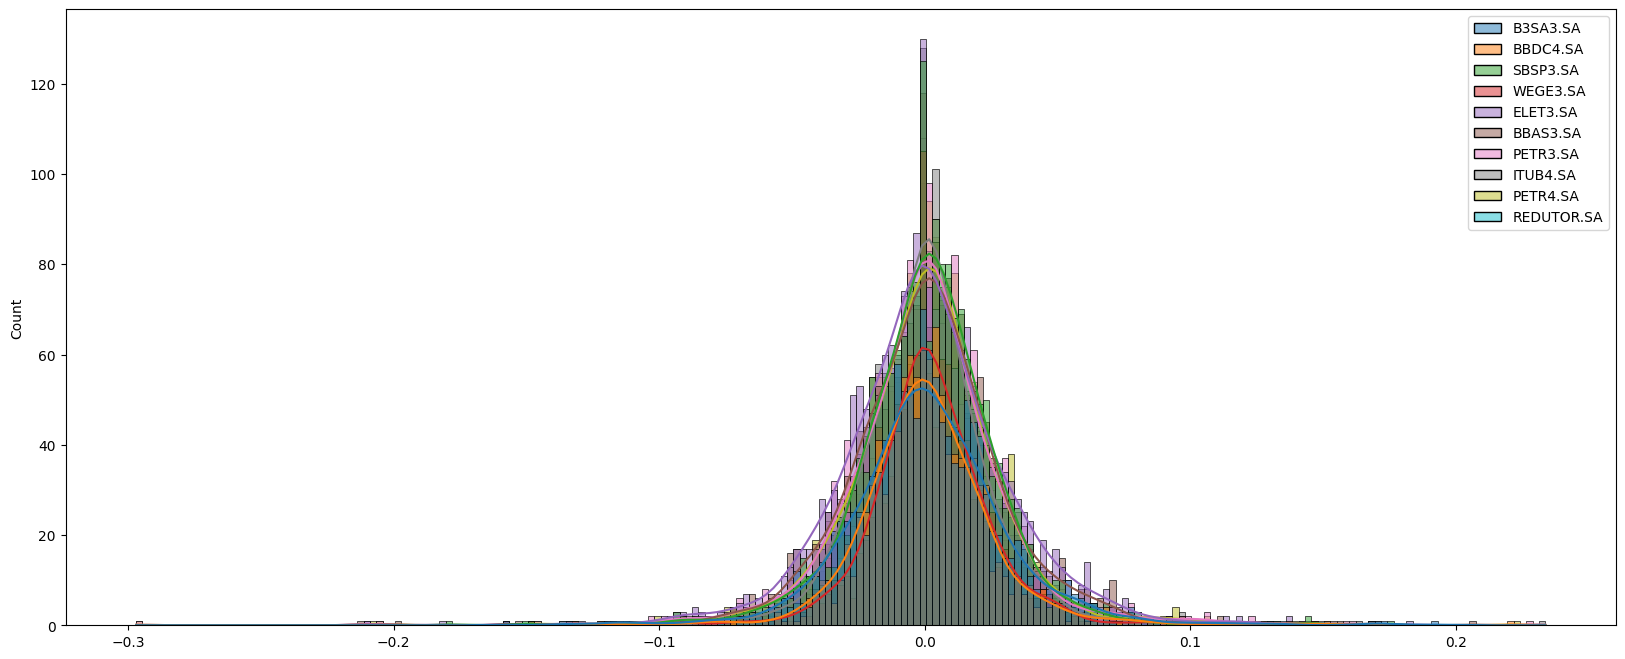

In [84]:
df_study = df_per_day[df_per_day.shift(1) < -0.01]

fig, ax = plt.subplots(figsize=(20, 8))
sn.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    if acao + '.SA' in df_study.columns:
        print('{} - {}'.format(acao, df_study[acao + '.SA'].dropna().mean() * 100))

print("Desvio padrão dos retornos")
for acao in acoes:
    if acao + '.SA' in df_study.columns:
        print('{} - {}'.format(acao, df_study[acao + '.SA'].dropna().std() * 100))


e por fim, 5%

Média dos retornos
B3SA3 - 0.03142597347759932
BBDC4 - 1.2470180688879051
SBSP3 - 0.23647527872638205
WEGE3 - 0.5030152082135687
ELET3 - 0.12151996815828922
BBAS3 - 0.5194701600166366
PETR3 - 0.14659471324641213
ITUB4 - 0.46671544540077287
PETR4 - 0.10531374264935656
Desvio padrão dos retornos
B3SA3 - 6.148187601862181
BBDC4 - 6.0352252901060135
SBSP3 - 4.303031830057943
WEGE3 - 4.722611357596651
ELET3 - 4.921224344209379
BBAS3 - 4.570999794189903
PETR3 - 5.401551856539014
ITUB4 - 4.885585635228513
PETR4 - 5.853505475068314


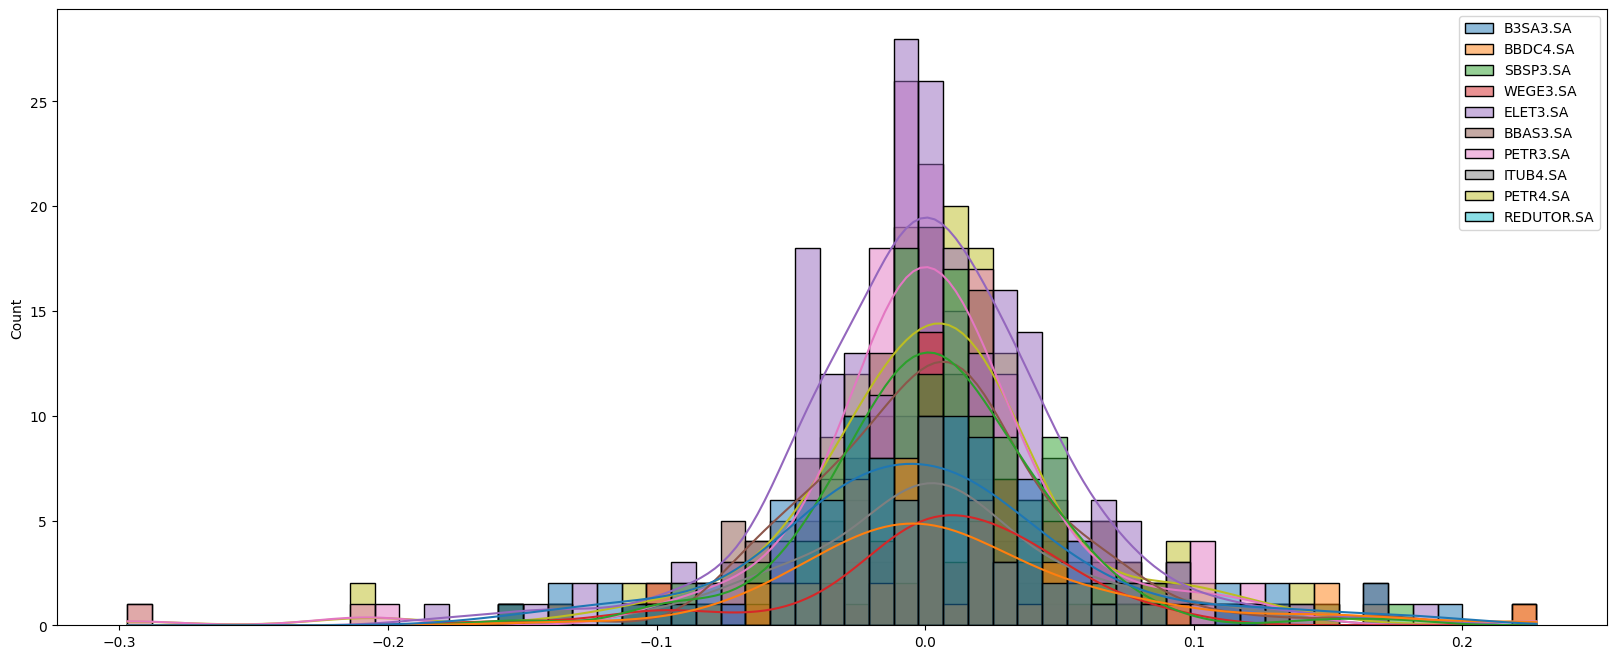

In [85]:
df_study = df_per_day[df_per_day.shift(1) < -0.05]

fig, ax = plt.subplots(figsize=(20, 8))
sn.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    if acao + '.SA' in df_study.columns:
        print('{} - {}'.format(acao, df_study[acao + '.SA'].dropna().mean() * 100))

print("Desvio padrão dos retornos")
for acao in acoes:
    if acao + '.SA' in df_study.columns:
        print('{} - {}'.format(acao, df_study[acao + '.SA'].dropna().std() * 100))
